### Import

In [1]:
import sys
sys.path.append('../code')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
import featureSpaceProcessing
import regression_per_task

### Load data

In [3]:
all_feature_dfs = pickle.load(open('../pickle_data/feature_dataframes/all_features_per_task_w_sensor_norm.p', 'rb'))

In [4]:
task_no = 0
all_feature_dfs[task_no].head()

,elbowL_x-elbowR_x,elbowL_x-handL_x,elbowL_y-handL_y,elbowL_z-elbowR_z,elbowL_z-handL_z,elbowL_z-wristL_z,elbowR_x-handL_x,elbowR_y-elbowL_y,elbowR_y-handL_y,elbowR_z-handL_z,...,max_speed,mean_speed,median_speed,min_speed,subject,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience
0,0.660275,0.608096,0.562639,0.0,0.578392,0.614779,0.442472,0.0,0.562639,0.578392,...,0.223263,0.492711,0.591914,1.000000,subject6,1.0,1.000000,1.0,0.500000,0.0
1,0.302603,0.650068,0.740239,0.0,0.674783,0.660596,0.758818,0.0,0.740239,0.674783,...,0.364316,0.620131,0.535475,0.507534,subject11,0.8,0.400000,1.0,0.000000,0.4
2,0.436446,0.773311,0.688995,0.0,0.746205,0.749837,0.721306,0.0,0.688995,0.746205,...,0.331960,0.587738,0.338909,0.282646,subject9,1.0,0.000000,1.0,1.000000,1.0
3,0.411087,0.533812,1.000000,0.0,0.490274,0.466943,0.602618,0.0,1.000000,0.490274,...,0.100439,0.032661,0.023508,0.055616,subject8,0.0,0.666667,1.0,0.666667,0.0
4,0.549409,0.241538,0.440183,0.0,0.599327,0.602337,0.319624,0.0,0.440183,0.599327,...,0.465448,0.263648,0.086479,0.050561,subject4,0.0,1.000000,0.0,0.000000,0.0


### Find top correlated features

In [5]:
big5 = ['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
feature_cols = [col for col in list(all_feature_dfs[task_no].columns) if not col in big5+['subject', 'index', 'task', 5]]
trait_no = 0

In [6]:
feature_cols

['elbowL_x-elbowR_x',
 'elbowL_x-handL_x',
 'elbowL_y-handL_y',
 'elbowL_z-elbowR_z',
 'elbowL_z-handL_z',
 'elbowL_z-wristL_z',
 'elbowR_x-handL_x',
 'elbowR_y-elbowL_y',
 'elbowR_y-handL_y',
 'elbowR_z-handL_z',
 'handR_x-elbowL_x',
 'handR_x-elbowR_x',
 'handR_x-handL_x',
 'handR_x-neck_x',
 'handR_x-shoulderL_x',
 'handR_x-wristL_x',
 'handR_x-wristR_x',
 'handR_y-elbowL_y',
 'handR_y-elbowR_y',
 'handR_y-handL_y',
 'handR_y-neck_y',
 'handR_y-shoulderL_y',
 'handR_y-wristL_y',
 'handR_y-wristR_y',
 'handR_z-elbowL_z',
 'handR_z-elbowR_z',
 'handR_z-handL_z',
 'handR_z-neck_z',
 'handR_z-shoulderL_z',
 'handR_z-wristL_z',
 'handR_z-wristR_z',
 'head_x-elbowL_x',
 'head_x-elbowR_x',
 'head_x-handL_x',
 'head_x-handR_x',
 'head_x-neck_x',
 'head_x-shoulderL_x',
 'head_x-spineShoulder_x',
 'head_x-wristL_x',
 'head_x-wristR_x',
 'head_y-elbowL_y',
 'head_y-elbowR_y',
 'head_y-handL_y',
 'head_y-handR_y',
 'head_y-neck_y',
 'head_y-shoulderL_y',
 'head_y-spineShoulder_y',
 'head_y-wris

In [7]:
featureSpaceProcessing.top_correlated_features(df = all_feature_dfs[task_no],
                                               feature_columns = feature_cols,
                                               correlate_to = big5[trait_no],
                                               threshold = 10,
                                               remove_from_feature_columns = big5)

['ampl_max_neck_z-handR_z',
 'ampl_max_spineMid_z-handR_z',
 'ampl_max_spineMid_z-handL_z',
 'ampl_mean_neck_z-handR_z',
 'ampl_mean_spineMid_z-handR_z',
 'ampl_max_neck_z-handL_z',
 'ampl_max_spineMid_x-handL_x',
 'ampl_max_spineMid_z-wristL_z',
 'ampl_mean_spineMid_y-handL_y',
 'ampl_max_spineMid_x-wristL_x']

In [8]:
corr_cols = featureSpaceProcessing.top_correlated_features(df = all_feature_dfs[task_no],
                                               feature_columns = feature_cols,
                                               correlate_to = big5[trait_no],
                                               threshold = 0.33,
                                               remove_from_feature_columns = big5)

In [9]:
#-np.sort(-all_feature_dfs[0][feature_cols].var())

#### Explore correlated columns

#### Variance

In [10]:
all_feature_dfs[0].var()[corr_cols]

ampl_max_neck_z-handR_z          0.052096
ampl_max_spineMid_z-handR_z      0.055820
ampl_max_spineMid_z-handL_z      0.034655
ampl_mean_neck_z-handR_z         0.057352
ampl_mean_spineMid_z-handR_z     0.046434
ampl_max_neck_z-handL_z          0.037157
ampl_max_spineMid_x-handL_x      0.058223
ampl_max_spineMid_z-wristL_z     0.033852
ampl_mean_spineMid_y-handL_y     0.027668
ampl_max_spineMid_x-wristL_x     0.064383
ampl_mean_spineMid_y-wristL_y    0.027747
ampl_freq_neck_x-handR_x         0.066588
dtype: float64

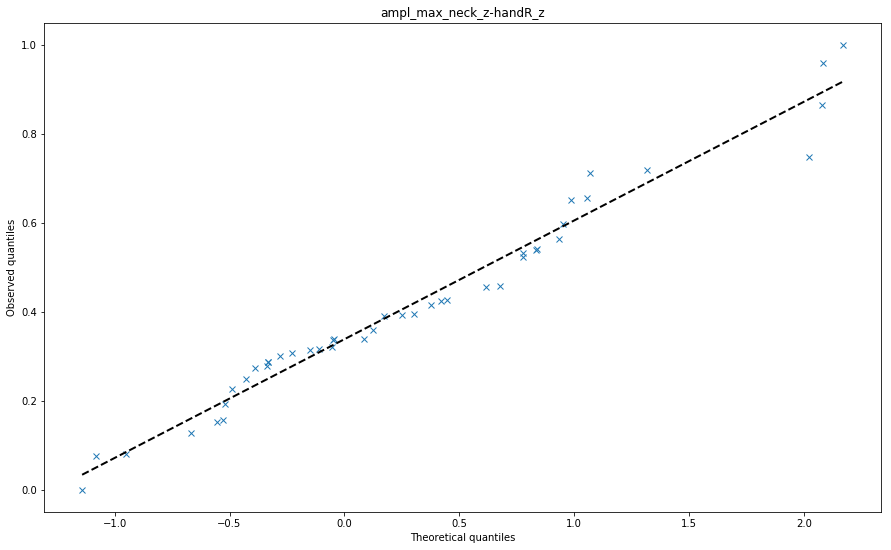

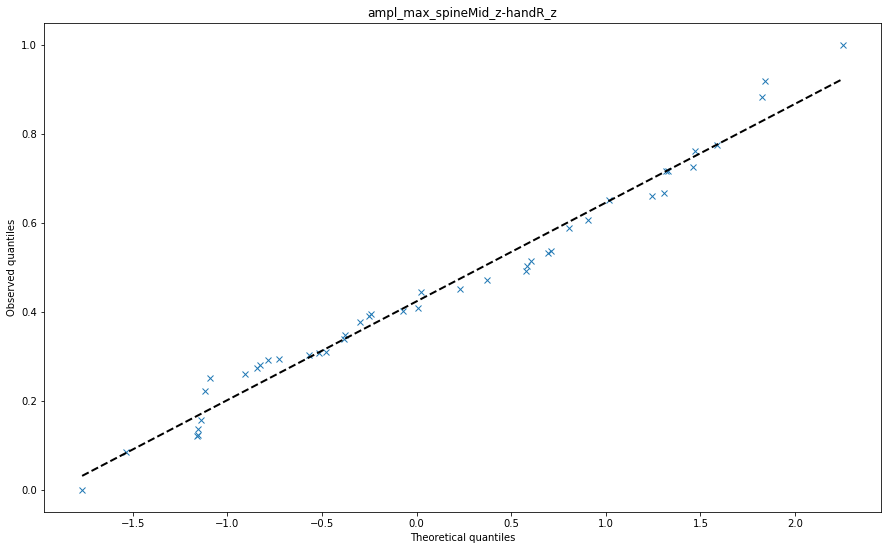

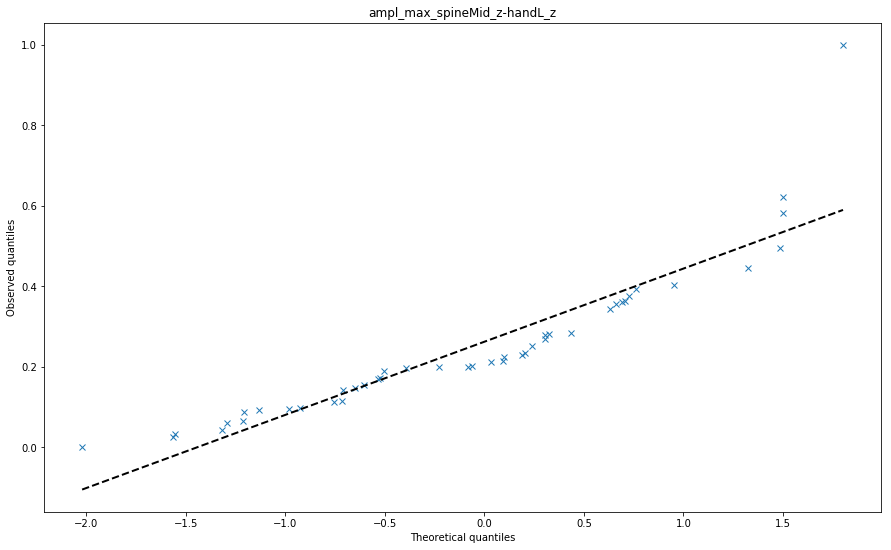

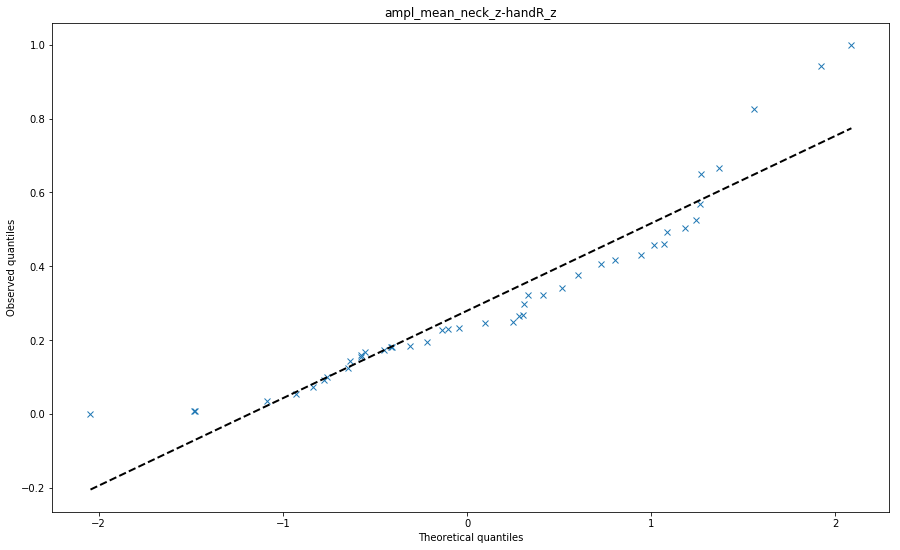

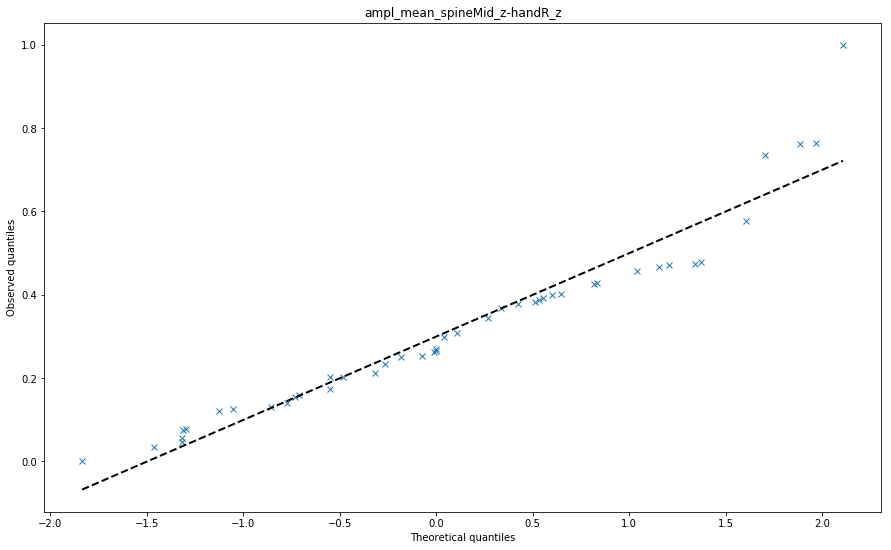

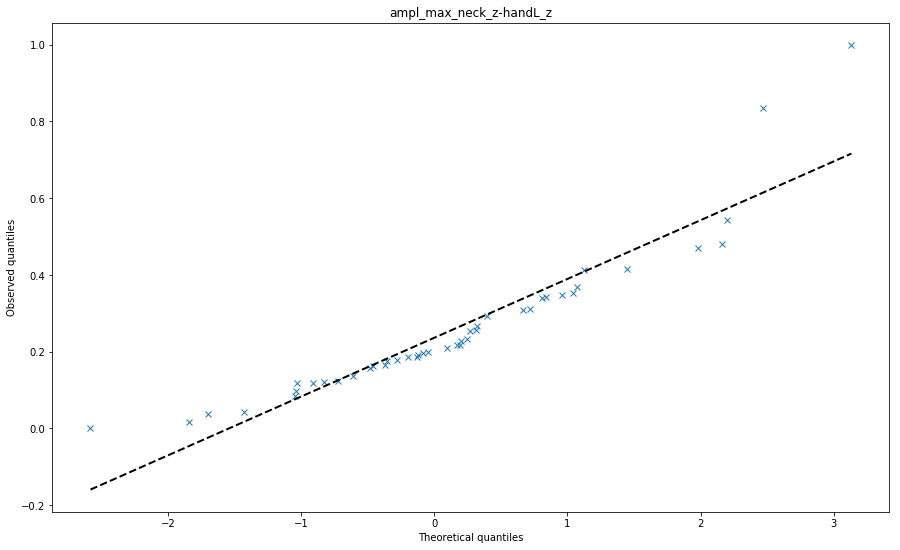

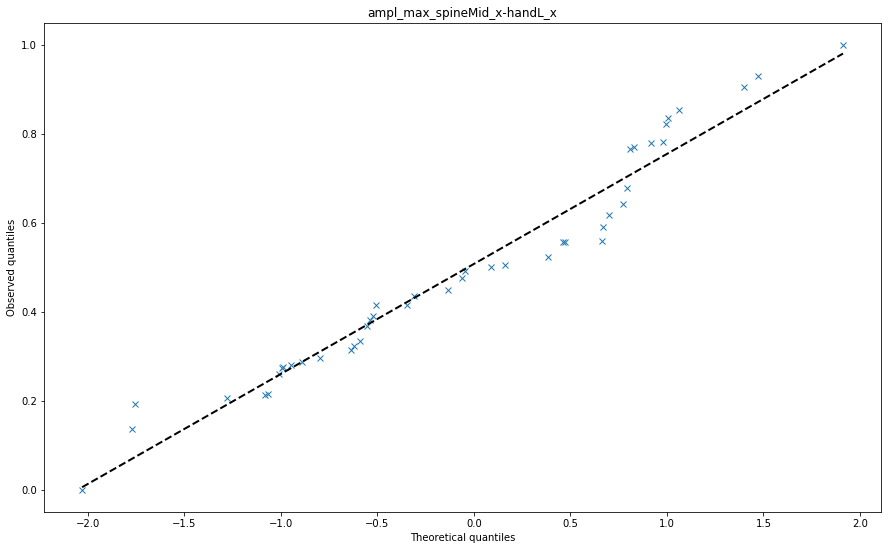

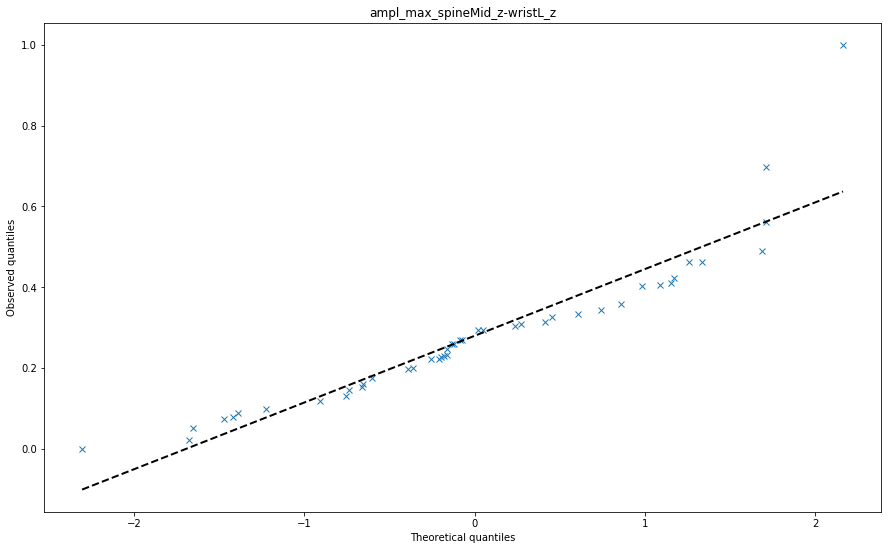

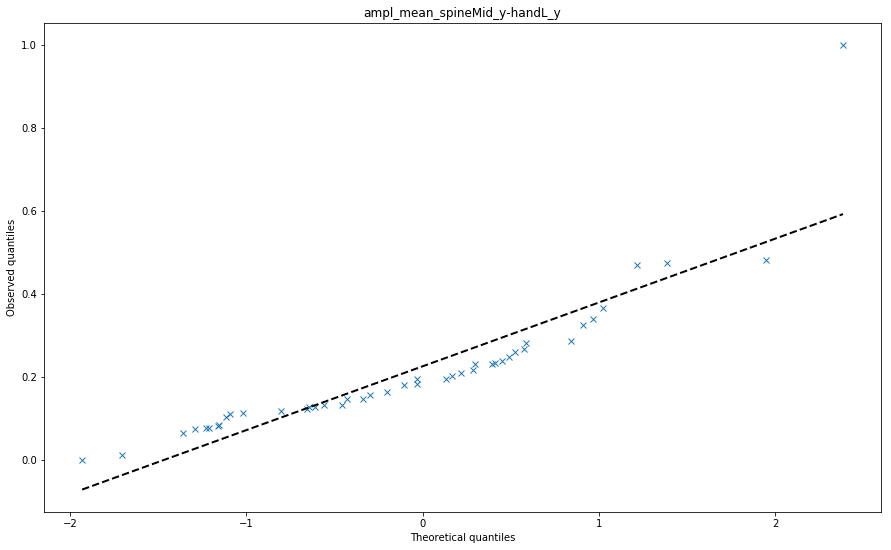

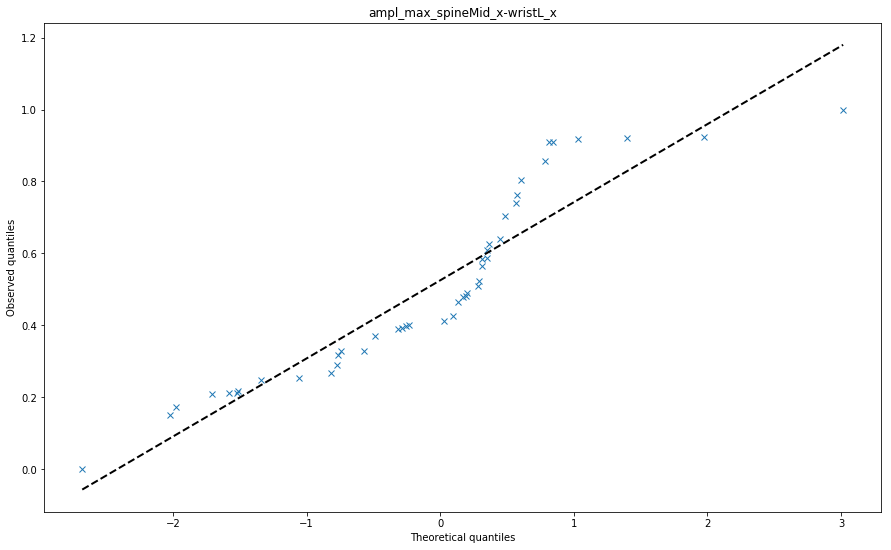

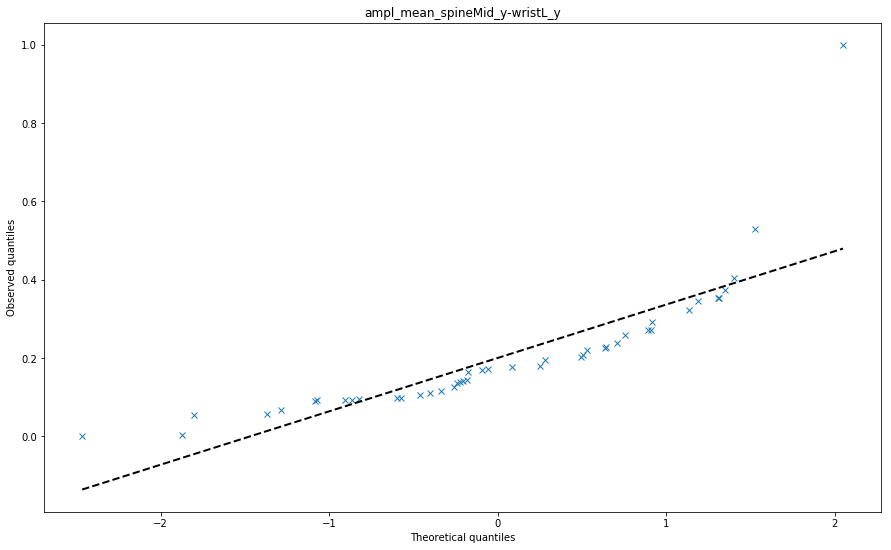

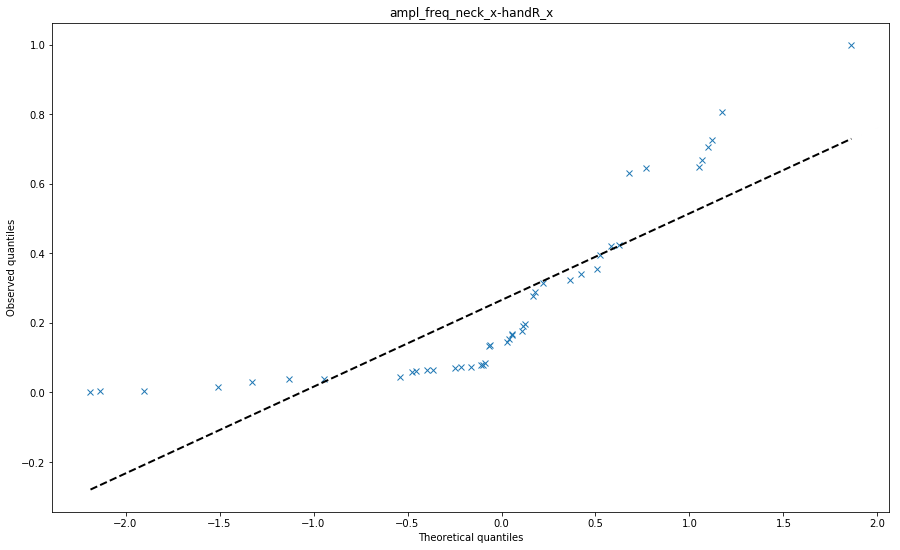

In [11]:
for i, feature in enumerate(corr_cols):
    plt.figure(figsize=(15,9))
    x = np.sort(all_feature_dfs[task_no][feature])
    #print task_no, feature
    norm=np.random.normal(0,1,len(x))
    norm.sort()
    #plt.subplot(n_plot_rows, n_plot_columns, i+1)
    #plt.plot(n_plot_rows, n_plot_columns, i+1)    
    plt.plot(norm, x, 'x')
    z = np.polyfit(norm,x, 1)
    #print z
    p = np.poly1d(z)
    plt.plot(norm,p(norm),"k--", linewidth=2)
    plt.title('{0}'.format(feature))
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Observed quantiles")
    plt.show()

#### Correlation

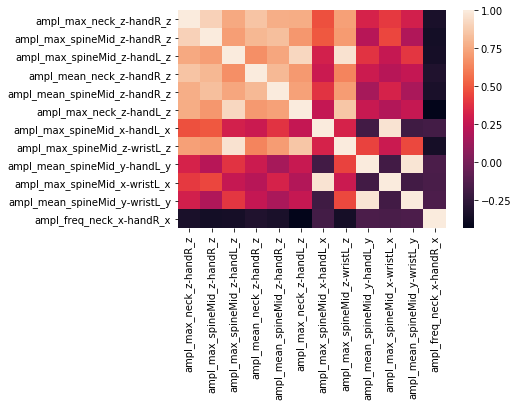

In [12]:
sns.heatmap(all_feature_dfs[0][corr_cols].corr())
plt.show()

### Fitting model with correlation based selection

In [13]:
path_to_pickle = '../pickle_data/feature_dataframes/all_features_per_task_w_sensor_norm.p'
test_size = 0.2

#### Baseline (no feature selection)

/home/morris/anaconda3/envs/mrp/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.2642603  -0.36596797 -0.37890418 -0.05126543  0.00188709]
[-0.13626429 -0.36764595 -0.38072958  0.12493872  0.22966754]
[-0.00094685 -0.36886474 -0.37234868 -0.54147559  0.00249365]
[ 0.33722024 -0.3711619  -0.01150102 -0.54285449 -0.002874  ]
[ 0.03833433 -0.38658897 -0.40191458 -0.53733189  0.42547302]
[-0.00938845  0.44211932 -0.20912045 -0.29939061 -0.01375537]



['KNN' 'Gauss_P' 'Gauss_P' 'KNN' 'Gauss_P']
['Bayes_R' 'Bayes_R' 'Bayes_R' 'ANN' 'Bayes_R']
['Gauss_P' 'Gauss_P' 'Gauss_P' 'Gauss_P' 'Gauss_P']
['SVM' 'Gauss_P' 'Ada_B' 'Gauss_P' 'Gauss_P']
['Gauss_P' 'Bayes_R' 'Gauss_P' 'Bayes_R' 'Ada_B']
['Gauss_P' 'Ada_B' 'Ada_B' 'Ada_B' 'Gauss_P']


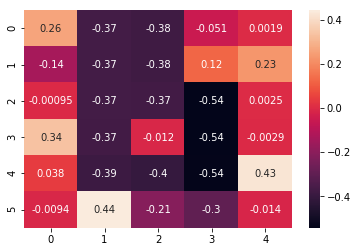

In [14]:
models_dict = regression_per_task.main(path_to_pickle=path_to_pickle,
                         test_size = test_size,
                         print_extended=False,
                         pca=False,
                         n_pca_var=None,
                         n_pca_cor=None,
                         variance_features=None)

#### Try different correlation thresholds

In [ ]:
thresholds = [0.3, 0.33, 0.35, 0.4, 0.45, 0.5]
n_min_corr_vars = [3, 5, 7, 9, 10, 11, 12]

**********
Minimum correlation variables: 3
Correlation threshold: 0.3
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.01276161 -0.80734098 -0.29543649 -0.46388559  0.38026852]
[-0.45877973  0.36242621 -0.17506784 -0.42488564  0.45144154]
[-0.11048003 -0.41587952 -0.10506597 -0.37323501  0.08051955]
[ 0.09343316 -0.37413552 -0.28143457 -0.62946533  0.30885726]
[ 0.06931667  0.00560391 -0.35846404 -0.37598444 -0.00066978]
[-0.20580789  0.28349722 -0.30271409 -0.17876543 -0.00101298]



['KNN' 'Bayes_R' 'ANN' 'Lin_Reg' 'ANN']
['Bayes_R' 'Ada_B' 'Ada_B' 'Lin_Reg' 'KNN']
['KNN' 'Bayes_R' 'SVM' 'Lin_Reg' 'Ada_B']
['KNN' 'Bayes_R' 'Lin_Reg' 'Bayes_R' 'KNN']
['Bayes_R' 'SVM' 'Ada_B' 'ANN' 'Bayes_R']
['Bayes_R' 'Ada_B' 'ANN' 'KNN' 'Bayes_R']


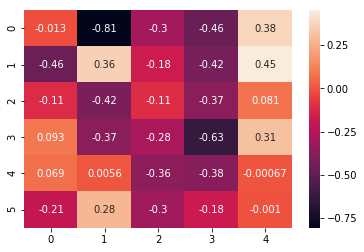

Correlation threshold: 0.33
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.28671292 -0.25521212 -0.10341345 -0.28756427  0.18009374]
[-0.63320542 -0.80968752 -0.37833631 -0.54402751  0.3477494 ]
[-0.14182935  0.26669816  0.13292172 -0.34865141  0.01365298]
[ 0.30436571 -0.17946795 -0.07699641 -0.42522787  0.30674107]
[ 0.07438165 -0.07663132 -0.37868856 -0.23663343  0.08403484]
[-0.2022426  -0.0234264  -0.3775235   0.48211519 -0.05154449]



['Ada_B' 'ANN' 'Lin_Reg' 'Lin_Reg' 'SVM']
['Bayes_R' 'ANN' 'Bayes_R' 'Bayes_R' 'Ada_B']
['KNN' 'KNN' 'Ada_B' 'Ada_B' 'ANN']
['Gauss_P' 'ANN' 'Ada_B' 'Lin_Reg' 'Ada_B']
['Bayes_R' 'ANN' 'Bayes_R' 'Ada_B' 'KNN']
['ANN' 'SVM' 'Bayes_R' 'Ada_B' 'ANN']


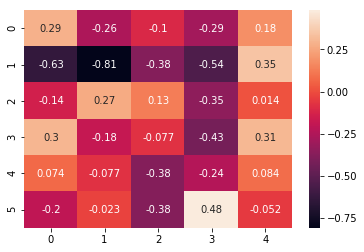

Correlation threshold: 0.35
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.10981074 -0.26731939 -0.10341345 -0.28756427  0.23688817]
[-0.23819343 -0.31383162 -0.14580875 -0.49329747  0.57566073]
[ 0.01975309 -0.36955583 -0.88053867 -0.44344721  0.0906331 ]
[ 0.28981151 -0.33896964 -0.31272118 -0.54152691  0.0228736 ]
[ 0.04383315  0.19923447 -0.37901443 -0.48962869  0.21662374]
[-0.08108674 -0.18939335 -0.3695024  -0.54050645 -0.18647571]



['Ada_B' 'SVM' 'Lin_Reg' 'Lin_Reg' 'ANN']
['ANN' 'ANN' 'Ada_B' 'Lin_Reg' 'KNN']
['KNN' 'Bayes_R' 'ANN' 'Lin_Reg' 'KNN']
['KNN' 'SVM' 'KNN' 'Bayes_R' 'SVM']
['Bayes_R' 'SVM' 'Bayes_R' 'Lin_Reg' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R']


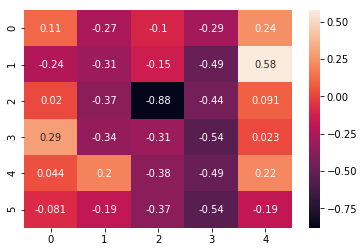

Correlation threshold: 0.4
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.16548364 -0.26731939 -0.06804588 -0.26480805  0.18009374]
[-0.58051171 -0.38716577 -0.8068986  -0.01773133  0.19774044]
[ 0.01477521 -0.36950347 -0.63070209 -0.53928812  0.07478859]
[-0.21194021 -0.32302632 -0.35248973 -0.04134034 -0.00053063]
[ 0.0393423   0.22791607 -0.37861011 -0.02585655  0.27926488]
[-0.12091591 -0.35412742 -0.3695024  -0.40610368 -0.13732598]



['ANN' 'SVM' 'Ada_B' 'ANN' 'SVM']
['ANN' 'Bayes_R' 'ANN' 'SVM' 'KNN']
['ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN']
['ANN' 'SVM' 'ANN' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'SVM' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'ANN' 'ANN']


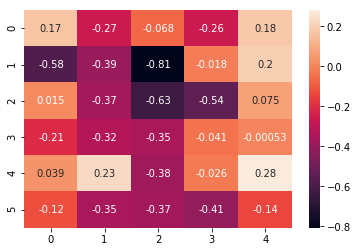

Correlation threshold: 0.45
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.51520163 -0.07372615 -0.5621166  -0.54185201  0.31040902]
[ -4.30851755e-01  -1.61823191e-01  -5.18495053e-01  -4.67550599e-01
   3.89548589e-04]
[ 0.03512427 -0.36950347 -0.63070209 -0.53928812  0.07478859]
[-0.07194603 -0.32302632 -0.41465416 -0.04134034  0.05403819]
[ 0.0393423   0.22791607 -0.37861011 -0.02585655  0.27926488]
[-0.06961907 -0.35269885 -0.3695024  -0.54050645 -0.18647571]



['KNN' 'KNN' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'ANN' 'Bayes_R']
['ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN']
['ANN' 'SVM' 'ANN' 'Lin_Reg' 'Ada_B']
['Bayes_R' 'SVM' 'Bayes_R' 'SVM' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R']


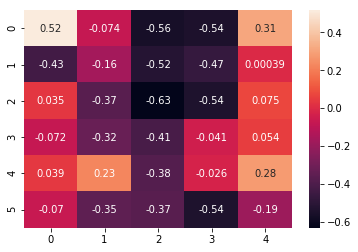

Correlation threshold: 0.5
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.48744938 -0.0613801  -0.54743655 -0.53153016  0.39857239]
[-0.48118774 -0.12718537 -0.45150331 -0.5408175  -0.01902923]
[ 0.0025376  -0.24605953 -0.63070209 -0.53928812  0.07478859]
[-0.0772772  -0.32302632 -0.43587969 -0.04134034 -0.00053063]
[ 0.12519542  0.22791607 -0.37861011 -0.02585655  0.27926488]
[-0.30124149 -0.36840243 -0.3695024  -0.54050645 -0.16184256]



['KNN' 'ANN' 'Bayes_R' 'Lin_Reg' 'Lin_Reg']
['ANN' 'ANN' 'ANN' 'Bayes_R' 'Bayes_R']
['ANN' 'ANN' 'Bayes_R' 'Bayes_R' 'KNN']
['ANN' 'SVM' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['Ada_B' 'SVM' 'Bayes_R' 'SVM' 'Lin_Reg']
['ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'ANN']


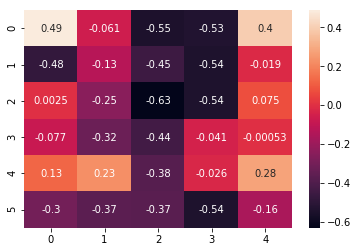

**********
Minimum correlation variables: 5
Correlation threshold: 0.3
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.01276161 -1.         -0.14384178 -0.23961088  0.20424394]
[-0.45877973 -0.28349028 -0.37845678 -0.41041178  0.25278555]
[ -1.10480026e-01  -4.05318169e-01  -1.53332318e-01  -6.22551330e-01
  -3.73651855e-04]
[ 0.09343316 -0.37039849 -0.06304561 -0.54551614  0.22002762]
[ 0.06931667  0.14298048 -0.36480285 -0.28583333 -0.00133492]
[-0.20580789  0.02760358 -0.12292284 -0.31392294 -0.25850515]



['KNN' 'Nan' 'ANN' 'Lin_Reg' 'Lin_Reg']
['Bayes_R' 'ANN' 'Bayes_R' 'Lin_Reg' 'KNN']
['KNN' 'Bayes_R' 'SVM' 'ANN' 'Bayes_R']
['KNN' 'Bayes_R' 'Lin_Reg' 'Bayes_R' 'KNN']
['Bayes_R' 'ANN' 'Lin_Reg' 'KNN' 'Bayes_R']
['Bayes_R' 'Ada_B' 'Ada_B' 'SVM' 'ANN']


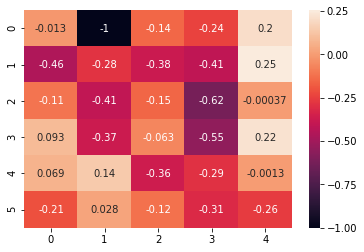

Correlation threshold: 0.33
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.28625992 -0.40989972 -0.04630603  0.08859775  0.2030719 ]
[-0.15651294 -0.31196839 -0.27400659 -0.54221586  0.41019675]
[ -1.41829354e-01   2.57962204e-01  -2.02278820e-02  -2.18933218e-01
  -2.23806354e-04]
[ 0.30436571 -0.30601535 -0.35306326 -0.07874759  0.16376174]
[ 0.07438165  0.1305605  -0.3789123  -0.44183924  0.05352694]
[-0.39349341 -0.08451906 -0.37752836 -0.32626543 -0.0766066 ]



['Ada_B' 'Bayes_R' 'Lin_Reg' 'Lin_Reg' 'SVM']
['ANN' 'ANN' 'Ada_B' 'Bayes_R' 'KNN']
['KNN' 'KNN' 'KNN' 'ANN' 'Bayes_R']
['Gauss_P' 'ANN' 'SVM' 'SVM' 'SVM']
['Bayes_R' 'SVM' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'KNN' 'ANN']


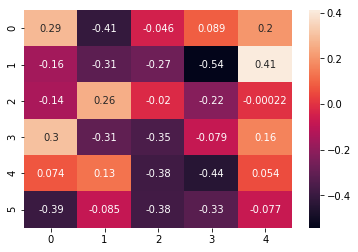

Correlation threshold: 0.35
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.09814153 -0.44141908 -0.12067388  0.27551667  0.24943946]
[-0.7382487  -0.3223492  -0.37895467 -0.41300236  0.48052261]
[ 0.09512072 -0.19293868 -1.         -0.54154722  0.25058011]
[  2.89811506e-01  -8.29285543e-02  -2.34904368e-01  -5.42456436e-01
  -2.70491774e-04]
[ 0.04383315  0.31745568 -0.378988   -0.27850315  0.31968505]
[-0.02121144 -0.1669926  -0.37749895 -0.45193433 -0.07021266]



['KNN' 'Bayes_R' 'Lin_Reg' 'Ada_B' 'SVM']
['ANN' 'ANN' 'Bayes_R' 'SVM' 'KNN']
['ANN' 'ANN' 'Nan' 'Bayes_R' 'KNN']
['KNN' 'ANN' 'SVM' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Lin_Reg' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'Ada_B' 'Bayes_R']


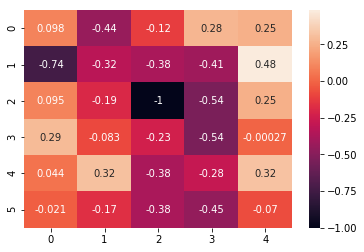

Correlation threshold: 0.4
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.05407986 -0.37190698 -0.42993207 -0.4129675   0.16171102]
[-0.32978725 -0.36879996 -0.98671838 -0.09992539  0.15554346]
[-0.09882593 -0.30613835 -0.6669549  -0.54154722  0.25058011]
[  2.51016581e-01  -2.88123888e-01  -4.05426167e-01   1.20710391e-01
  -2.61446464e-04]
[ 0.08439142  0.31745568 -0.378988   -0.23335045  0.31968505]
[-0.11725734 -0.03351014 -0.37749895 -0.34181574 -0.07021266]



['Bayes_R' 'ANN' 'Bayes_R' 'Lin_Reg' 'SVM']
['ANN' 'Bayes_R' 'Ada_B' 'SVM' 'Lin_Reg']
['KNN' 'ANN' 'ANN' 'Bayes_R' 'KNN']
['KNN' 'SVM' 'Bayes_R' 'SVM' 'Bayes_R']
['Ada_B' 'SVM' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'Ada_B' 'Bayes_R']


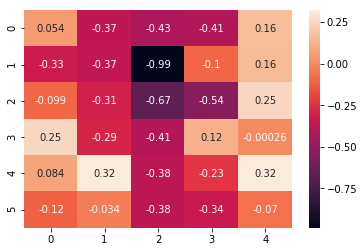

Correlation threshold: 0.45
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.19095519 -0.22594487 -0.45887292 -0.54171091  0.02057737]
[ -5.55725068e-01  -3.69058907e-01  -9.91820379e-01  -3.24876543e-01
  -9.43462387e-04]
[-0.05283081 -0.36929043 -0.85323764 -0.54154722  0.25058011]
[  2.51016581e-01  -2.88123888e-01  -4.05426167e-01   1.20710391e-01
  -2.61446464e-04]
[ 0.04383315  0.31745568 -0.378988    0.46641541  0.31968505]
[-0.17900841 -0.12088323 -0.37749895 -0.28976499 -0.07021266]



['Bayes_R' 'ANN' 'ANN' 'Bayes_R' 'Lin_Reg']
['Lin_Reg' 'Bayes_R' 'Bayes_R' 'KNN' 'Bayes_R']
['ANN' 'Bayes_R' 'ANN' 'Bayes_R' 'KNN']
['KNN' 'SVM' 'Bayes_R' 'SVM' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'Ada_B' 'Bayes_R']


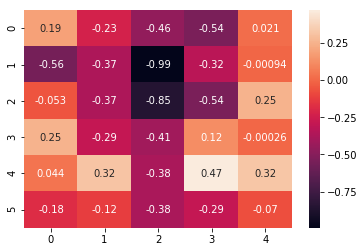

Correlation threshold: 0.5
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.19095519 -0.25268854 -0.48912493 -0.54171091  0.02057737]
[ -4.96996438e-01  -2.75288566e-01  -9.91820379e-01  -1.71915805e-01
  -9.43462387e-04]
[-0.09882593 -0.36421348 -0.78850715 -0.54154722  0.25058011]
[  2.51016581e-01  -2.88123888e-01  -4.05426167e-01   1.20710391e-01
  -2.61446464e-04]
[ 0.04383315  0.35795782 -0.378988   -0.25422493  0.31968505]
[-0.20834712 -0.1669926  -0.37749895 -0.48060387 -0.07021266]



['Bayes_R' 'KNN' 'KNN' 'Bayes_R' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'Ada_B' 'Bayes_R']
['KNN' 'ANN' 'ANN' 'Bayes_R' 'KNN']
['KNN' 'SVM' 'Bayes_R' 'SVM' 'Bayes_R']
['Bayes_R' 'Ada_B' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'Ada_B' 'Bayes_R']


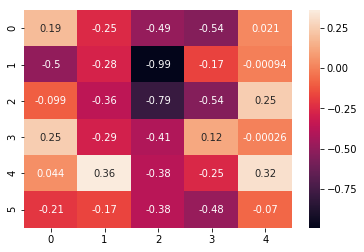

**********
Minimum correlation variables: 7
Correlation threshold: 0.3
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.18763705 -0.44275205  0.03380536  0.05002479  0.09709676]
[-0.42431544 -0.44629836 -0.22750941 -0.54425253  0.34555587]
[  1.10456601e-02  -2.82916131e-01  -1.64600679e-01  -4.97115600e-01
  -4.32302938e-04]
[ 0.09343316  0.55908496 -0.3548567  -0.46579901 -0.00056059]
[ 0.06931667  0.03531307 -0.37819689 -0.30941358  0.01486087]
[-0.20580789  0.08558752 -0.37835694 -0.45829253 -0.37742977]



['ANN' 'Bayes_R' 'KNN' 'Lin_Reg' 'SVM']
['ANN' 'Ada_B' 'Ada_B' 'Bayes_R' 'KNN']
['ANN' 'Lin_Reg' 'SVM' 'ANN' 'Bayes_R']
['KNN' 'ANN' 'Ada_B' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'ANN' 'Bayes_R' 'KNN' 'ANN']
['Bayes_R' 'Ada_B' 'Bayes_R' 'SVM' 'ANN']


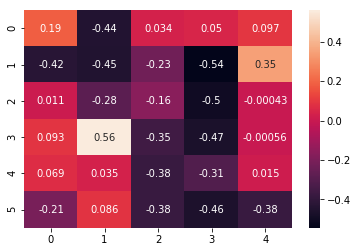

Correlation threshold: 0.33
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[  2.22904156e-01  -3.74018475e-01  -1.34216716e-01   2.93574251e-01
  -1.38053617e-04]
[-0.63320542  0.12543006 -0.37913399 -0.54154201  0.39168847]
[ 0.04509606  0.12707256 -0.11969169 -0.22973303  0.00907993]
[  3.04365705e-01  -2.95222520e-01  -3.71840547e-01  -5.41820590e-01
   3.93825444e-06]
[ 0.07438165  0.1121049  -0.37907908 -0.2349926   0.12627072]
[-0.30007611 -0.07740832 -0.37748955 -0.35973582 -0.0918171 ]



['Ada_B' 'Bayes_R' 'ANN' 'Ada_B' 'Bayes_R']
['Bayes_R' 'ANN' 'Bayes_R' 'Bayes_R' 'KNN']
['ANN' 'KNN' 'KNN' 'Ada_B' 'ANN']
['Gauss_P' 'ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Ada_B' 'KNN']
['ANN' 'SVM' 'Bayes_R' 'Ada_B' 'Bayes_R']


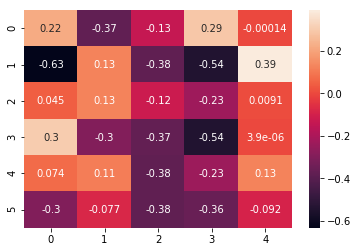

Correlation threshold: 0.35
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.26202098 -0.37362796 -0.33075062  0.29234027  0.05316498]
[-0.6819008  -0.35982442 -0.62780766 -0.1405717   0.10096257]
[ 0.09000635 -0.36900233 -0.9222118  -0.5428556   0.22825547]
[ 0.28981151 -0.25015049 -0.35980481 -0.43054486 -0.00045667]
[ 0.05556395  0.0794724  -0.31977641 -0.25458391  0.43469027]
[-0.15602084 -0.33441273 -0.37771832 -0.17361111 -0.00548413]



['Ada_B' 'Bayes_R' 'Lin_Reg' 'Ada_B' 'Ada_B']
['ANN' 'ANN' 'Ada_B' 'SVM' 'ANN']
['ANN' 'Bayes_R' 'KNN' 'Bayes_R' 'Lin_Reg']
['KNN' 'ANN' 'SVM' 'ANN' 'Bayes_R']
['Bayes_R' 'SVM' 'KNN' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'KNN' 'Bayes_R']


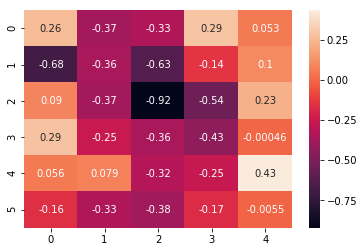

Correlation threshold: 0.4
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.05407986 -0.37161889 -0.45402354 -0.34508195  0.31025414]
[-0.59470606 -0.22714698 -1.         -0.18981481  0.30437592]
[ 0.01975309 -0.08874837 -0.9222118  -0.5428556   0.22825547]
[  2.44621784e-01  -2.90559064e-01  -3.83123347e-01  -1.77694059e-01
  -2.98328475e-04]
[ 0.05556395  0.0794724  -0.31977641 -0.33321087  0.43469027]
[-0.17349835 -0.20741058 -0.37771832 -0.17361111 -0.00548413]



['Bayes_R' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'SVM']
['ANN' 'ANN' 'Nan' 'KNN' 'KNN']
['KNN' 'ANN' 'KNN' 'Bayes_R' 'Lin_Reg']
['KNN' 'SVM' 'Bayes_R' 'SVM' 'Bayes_R']
['Bayes_R' 'SVM' 'KNN' 'Ada_B' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'KNN' 'Bayes_R']


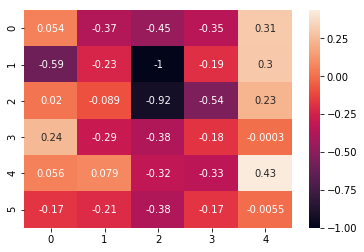

Correlation threshold: 0.45
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.08585618 -0.37161889 -0.39309943 -0.34508195  0.31025414]
[-0.49125871 -0.36868527 -0.68115686 -0.18981481  0.30437592]
[ 0.04993    -0.36900233 -0.83771723  0.10684132  0.22825547]
[  2.44621784e-01  -2.90559064e-01  -3.83123347e-01  -1.77694059e-01
  -2.98328475e-04]
[ 0.05556395  0.0794724  -0.31977641  0.07377086  0.43469027]
[-0.11373649 -0.33441273 -0.37771832 -0.17361111 -0.00548413]



['ANN' 'Bayes_R' 'ANN' 'Lin_Reg' 'SVM']
['ANN' 'Bayes_R' 'ANN' 'KNN' 'KNN']
['ANN' 'Bayes_R' 'ANN' 'ANN' 'Lin_Reg']
['KNN' 'SVM' 'Bayes_R' 'SVM' 'Bayes_R']
['Bayes_R' 'SVM' 'KNN' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'KNN' 'Bayes_R']


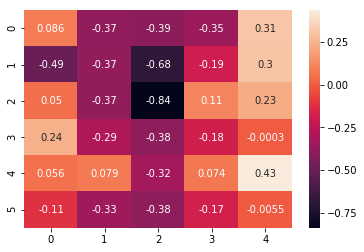

Correlation threshold: 0.5
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.09909082 -0.37161889 -0.45402354 -0.34508195  0.31025414]
[-0.48176216 -0.36868527 -0.86458357 -0.18981481  0.30437592]
[ 0.01975309 -0.36900233 -0.9222118  -0.5428556   0.22825547]
[  2.44621784e-01  -2.90559064e-01  -3.83123347e-01  -1.77694059e-01
  -2.98328475e-04]
[ 0.05556395  0.0794724  -0.31977641  0.06134757  0.43469027]
[-0.22043549 -0.1831602  -0.37771832 -0.17361111 -0.00548413]



['ANN' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'SVM']
['ANN' 'Bayes_R' 'ANN' 'KNN' 'KNN']
['KNN' 'Bayes_R' 'KNN' 'Bayes_R' 'Lin_Reg']
['KNN' 'SVM' 'Bayes_R' 'SVM' 'Bayes_R']
['Bayes_R' 'SVM' 'KNN' 'Ada_B' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'KNN' 'Bayes_R']


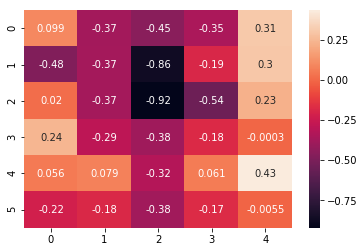

**********
Minimum correlation variables: 9
Correlation threshold: 0.3
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.01276161 -0.38309045  0.14441126  0.00150413  0.41762431]
[-0.45877973  0.10033841 -0.37891789 -0.54157326  0.46420228]
[ -1.10480026e-01  -3.18432640e-01  -2.20316614e-01  -6.95432099e-01
  -4.97701946e-04]
[  9.34331575e-02  -3.69547939e-01   5.52675907e-03  -5.43575371e-01
  -3.54153701e-04]
[ 0.12288492 -0.02138312 -0.37848052 -0.47335015  0.0442959 ]
[-0.1273245   0.21715858 -0.37828904 -0.49601224 -0.26672132]



['KNN' 'Bayes_R' 'KNN' 'Lin_Reg' 'KNN']
['Bayes_R' 'Ada_B' 'Bayes_R' 'Bayes_R' 'KNN']
['KNN' 'Lin_Reg' 'SVM' 'KNN' 'Bayes_R']
['KNN' 'Bayes_R' 'Lin_Reg' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'Bayes_R' 'Lin_Reg' 'ANN']
['Ada_B' 'Ada_B' 'Bayes_R' 'Bayes_R' 'ANN']


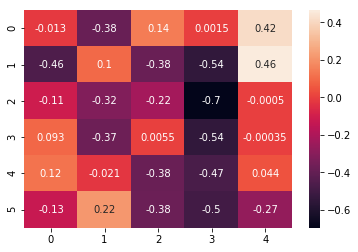

Correlation threshold: 0.33
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[  2.22433320e-01  -3.72163998e-01  -3.81050672e-01   1.01554469e-01
  -2.29381222e-04]
[-0.63320542 -0.59696424 -0.51438081 -0.45220875 -0.06611921]
[-0.14182935 -0.36863163 -0.3825271  -0.53980701  0.16737569]
[  3.04365705e-01  -3.67808037e-01  -3.66383892e-01   5.86366866e-02
  -1.16037488e-04]
[ 0.08361047  0.07016139 -0.37915365 -0.53364505  0.24159318]
[-0.02015869 -0.10991005 -0.3777814  -0.21141975 -0.00976847]



['Ada_B' 'Bayes_R' 'Lin_Reg' 'Ada_B' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'Ada_B' 'ANN' 'ANN']
['KNN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN']
['Gauss_P' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'KNN' 'Bayes_R']


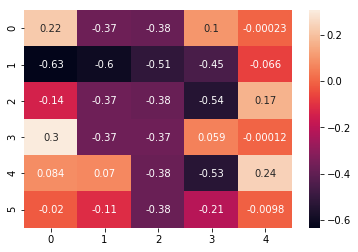

Correlation threshold: 0.35
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[  9.81415310e-02  -3.71573480e-01  -4.23498891e-01  -1.57681048e-01
   9.41795364e-05]
[-0.75284359 -0.5291135  -0.44607841 -0.06796016 -0.10534052]
[ 0.11752185 -0.10860438 -1.         -0.5427075   0.35342511]
[  2.05773921e-01   4.97043728e-02  -3.30376960e-01  -1.79207931e-01
  -2.79499245e-05]
[ 0.08361047  0.07016139 -0.37915365 -0.53364505  0.24159318]
[-0.20041452 -0.3348201  -0.37819675 -0.33674519 -0.00393727]



['KNN' 'Bayes_R' 'Bayes_R' 'SVM' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'Ada_B' 'SVM' 'Ada_B']
['ANN' 'Lin_Reg' 'Nan' 'Bayes_R' 'Lin_Reg']
['KNN' 'ANN' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'Lin_Reg' 'Bayes_R']


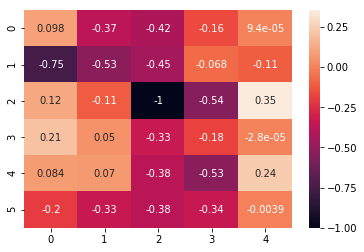

Correlation threshold: 0.4
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.11647628 -0.37056616 -0.48805992 -0.16960551  0.13320043]
[-0.72192247  0.05719855 -0.46598975 -0.41006173  0.0240076 ]
[-0.01582062 -0.10860438 -1.         -0.15912489  0.35342511]
[  2.05773921e-01  -3.68292428e-01  -3.30376960e-01  -1.79207931e-01
  -2.79499245e-05]
[ 0.08361047  0.07016139 -0.37915365 -0.14366405  0.24159318]
[-0.19302951 -0.3348201  -0.37819675 -0.2418606  -0.00393727]



['KNN' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'SVM']
['ANN' 'ANN' 'ANN' 'KNN' 'Bayes_R']
['KNN' 'Lin_Reg' 'Nan' 'ANN' 'Lin_Reg']
['KNN' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'ANN' 'Bayes_R']


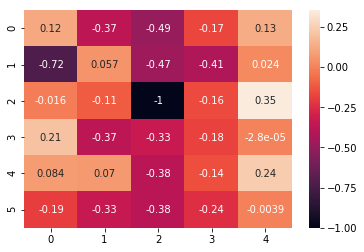

Correlation threshold: 0.45
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.20835646 -0.26020688 -0.39574499 -0.16960551  0.13320043]
[-0.64537477 -0.3678343  -0.66115192 -0.41006173  0.13257447]
[-0.01582062 -0.10860438 -0.96232615 -0.32231423  0.35342511]
[ 0.20577392 -0.36829243 -0.33037696 -0.17920793  0.02453536]
[ 0.08361047  0.07016139 -0.37915365 -0.49303743  0.24159318]
[-0.3046814  -0.3348201  -0.37819675 -0.33674519 -0.00393727]



['ANN' 'ANN' 'ANN' 'Lin_Reg' 'SVM']
['ANN' 'Bayes_R' 'ANN' 'KNN' 'ANN']
['KNN' 'Lin_Reg' 'ANN' 'Ada_B' 'Lin_Reg']
['KNN' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'ANN']
['Bayes_R' 'SVM' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'Lin_Reg' 'Bayes_R']


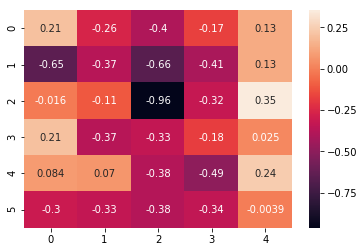

Correlation threshold: 0.5
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.11647628 -0.37056616 -0.42865575 -0.16960551  0.13320043]
[-0.6666509  -0.3678343  -1.         -0.41006173  0.08349827]
[-0.01582062 -0.10860438 -0.60463115 -0.5427075   0.35342511]
[  2.05773921e-01  -3.68292428e-01  -3.30376960e-01  -1.79207931e-01
  -2.79499245e-05]
[ 0.08361047  0.07016139 -0.37915365 -0.16456705  0.24159318]
[-0.16647612 -0.14886348 -0.37819675 -0.33674519  0.08933283]



['KNN' 'Bayes_R' 'ANN' 'Lin_Reg' 'SVM']
['ANN' 'Bayes_R' 'Nan' 'KNN' 'ANN']
['KNN' 'Lin_Reg' 'ANN' 'Bayes_R' 'Lin_Reg']
['KNN' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'Lin_Reg' 'ANN']


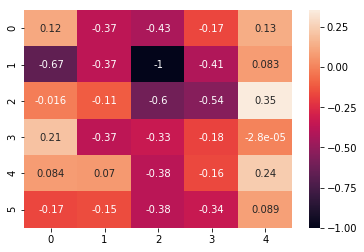

**********
Minimum correlation variables: 10
Correlation threshold: 0.3
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.01276161 -0.37767561  0.04982681  0.66658265  0.46734807]
[-0.07333164 -0.01573366 -0.32544639 -0.54118761  0.46420228]
[ -1.10480026e-01  -3.83799727e-01  -1.52237583e-01  -4.71060506e-01
  -3.98051805e-04]
[  9.34331575e-02  -3.22570468e-01   8.33477891e-02  -5.42989602e-01
  -3.13609785e-04]
[ 0.06931667  0.05359451 -0.37866728 -0.14098635 -0.00181165]
[-0.20580789 -0.01962554 -0.37798343 -0.32142749 -0.00535277]



['KNN' 'Bayes_R' 'KNN' 'Ada_B' 'KNN']
['ANN' 'ANN' 'Ada_B' 'Bayes_R' 'KNN']
['KNN' 'Bayes_R' 'SVM' 'ANN' 'Bayes_R']
['KNN' 'ANN' 'SVM' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'ANN' 'Bayes_R']
['Bayes_R' 'Ada_B' 'Bayes_R' 'SVM' 'ANN']


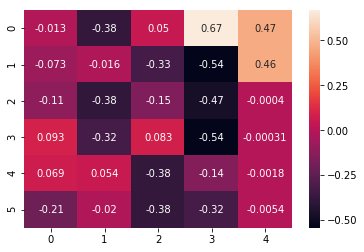

Correlation threshold: 0.33
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[  6.66576416e-02  -1.49416361e-01  -3.88488639e-01  -9.32683853e-02
  -3.18418733e-04]
[-0.63320542 -0.5756485  -0.40354623 -0.54110387  0.00756455]
[-0.14182935 -0.3685184  -0.55886557 -0.54050195  0.22679558]
[  3.04365705e-01  -3.67756303e-01  -3.72106273e-01  -4.62212080e-03
  -7.62601517e-05]
[ 0.07952776  0.07379184 -0.37911506 -0.33029142  0.1991073 ]
[-0.28689551 -0.20833574 -0.37815973 -0.11547837 -0.00285312]



['ANN' 'ANN' 'ANN' 'SVM' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'Ada_B' 'Bayes_R' 'KNN']
['KNN' 'Bayes_R' 'ANN' 'Bayes_R' 'KNN']
['Gauss_P' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'Ada_B' 'Bayes_R']


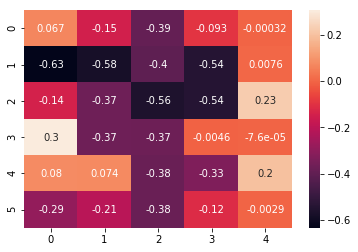

Correlation threshold: 0.35
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.28094246 -0.37129724 -0.45782211 -0.12162732  0.06981602]
[-0.75284359 -0.46781801 -0.53759279 -0.27146643  0.22555982]
[ 0.1587404  -0.10860438 -1.         -0.43151676  0.35342511]
[ -8.51870758e-02  -3.68285636e-01  -3.47636100e-01  -2.67422796e-01
   1.94127421e-05]
[ 0.07952776  0.07379184 -0.37911506 -0.01325471  0.1991073 ]
[-0.35898358 -0.20833574 -0.18046881 -0.38584928 -0.00285312]



['Ada_B' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'ANN']
['Bayes_R' 'Bayes_R' 'ANN' 'SVM' 'KNN']
['ANN' 'Lin_Reg' 'Nan' 'ANN' 'Lin_Reg']
['KNN' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'ANN' 'Lin_Reg' 'Bayes_R']


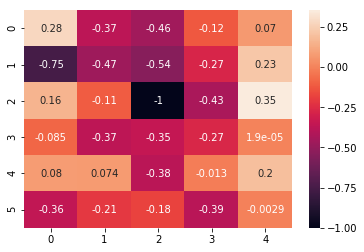

Correlation threshold: 0.4
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.36120165 -0.37053488  0.00924879 -0.06502134  0.01683487]
[-0.48339827 -0.22719102 -0.56653161 -0.47984928  0.10582273]
[ 0.0335379  -0.10860438 -0.75698019  0.21042716  0.35342511]
[ -8.51870758e-02  -1.29353395e-01  -2.24663080e-01  -2.66721563e-01
   1.94127421e-05]
[ 0.07952776  0.07379184 -0.37911506  0.0515201   0.1991073 ]
[ 0.01359849 -0.20833574 -0.37815973 -0.38584928 -0.00285312]



['Gauss_P' 'Bayes_R' 'KNN' 'Lin_Reg' 'Ada_B']
['ANN' 'ANN' 'ANN' 'SVM' 'ANN']
['KNN' 'Lin_Reg' 'ANN' 'ANN' 'Lin_Reg']
['KNN' 'ANN' 'ANN' 'ANN' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'Lin_Reg' 'Bayes_R']


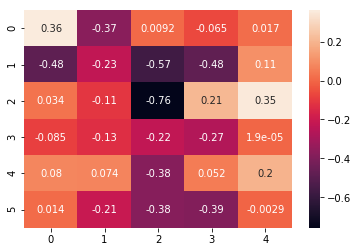

Correlation threshold: 0.45
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.36120165 -0.37053488  0.00924879 -0.06502134  0.10400666]
[-0.68377417 -0.36844214 -0.80008839 -0.47984928 -0.13338482]
[ 0.0335379  -0.10860438 -1.         -0.54222768  0.35342511]
[ -7.80683216e-02  -3.68285636e-01  -2.53039476e-01  -2.67422796e-01
   1.94127421e-05]
[ 0.07952776  0.07379184 -0.37911506 -0.1857366   0.1991073 ]
[-0.04758096 -0.17815842 -0.37815973 -0.38584928 -0.00285312]



['Gauss_P' 'Bayes_R' 'KNN' 'Lin_Reg' 'Ada_B']
['ANN' 'Bayes_R' 'Ada_B' 'SVM' 'KNN']
['KNN' 'Lin_Reg' 'Nan' 'Bayes_R' 'Lin_Reg']
['ANN' 'Bayes_R' 'ANN' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'Lin_Reg' 'Bayes_R']


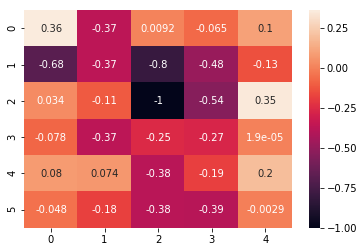

Correlation threshold: 0.5
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.36120165 -0.2880106   0.00924879 -0.06502134  0.01709542]
[-0.44837398 -0.29078941 -0.82013798 -0.47984928 -0.13338482]
[ 0.0335379  -0.10860438 -0.88147473 -0.54222768  0.35342511]
[ -8.51870758e-02  -3.68285636e-01  -2.48550199e-01  -2.67422796e-01
   1.94127421e-05]
[ 0.07952776  0.07379184 -0.37911506 -0.1019625   0.1991073 ]
[-0.23000485 -0.20833574 -0.37815973 -0.38584928 -0.00285312]



['Gauss_P' 'ANN' 'KNN' 'Lin_Reg' 'Ada_B']
['ANN' 'ANN' 'Ada_B' 'SVM' 'KNN']
['KNN' 'Lin_Reg' 'ANN' 'Bayes_R' 'Lin_Reg']
['KNN' 'Bayes_R' 'ANN' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'Lin_Reg' 'Bayes_R']


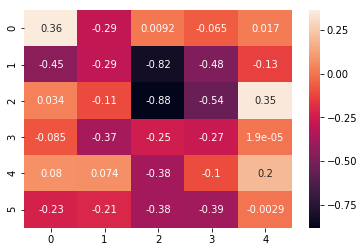

**********
Minimum correlation variables: 11
Correlation threshold: 0.3
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.1772689  -0.37674636 -0.31050831  0.78859458  0.44361667]
[-0.45877973 -0.17725335 -0.4261316  -0.540956    0.42165689]
[-0.11048003 -0.38177083 -0.11181399 -0.58884376  0.04345897]
[  9.34331575e-02  -8.47422025e-02  -2.03571273e-01  -5.42875283e-01
  -3.35498708e-04]
[ 0.06931667 -0.2291698  -0.37849732 -0.49679565 -0.00104788]
[ 0.02227307 -0.12518572 -0.37778886 -0.41146855  0.13950491]



['ANN' 'Bayes_R' 'KNN' 'Ada_B' 'Lin_Reg']
['Bayes_R' 'Ada_B' 'Ada_B' 'Bayes_R' 'KNN']
['KNN' 'Bayes_R' 'SVM' 'Bayes_R' 'Ada_B']
['KNN' 'ANN' 'SVM' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['Ada_B' 'SVM' 'Bayes_R' 'SVM' 'ANN']


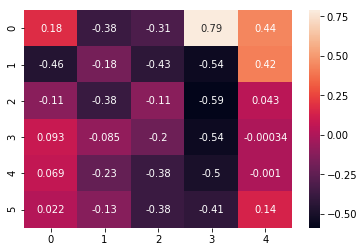

Correlation threshold: 0.33
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[  3.30868190e-02  -3.71117622e-01  -4.04228179e-01   1.14102891e-01
  -1.52718512e-04]
[-0.63320542 -0.4357981  -0.4344199  -0.54118766  0.3457312 ]
[ -1.41829354e-01  -2.19092530e-01  -3.64208579e-01  -5.40652064e-01
  -3.63897895e-04]
[  3.04365705e-01  -2.77108620e-01  -5.25084519e-01   1.58053695e-01
  -1.81692510e-05]
[ 0.0506225   0.06115138 -0.37884434 -0.54137609  0.35721938]
[-0.18324159 -0.27201535 -0.37809222 -0.40277778 -0.00213474]



['Ada_B' 'Bayes_R' 'Bayes_R' 'Ada_B' 'Bayes_R']
['Bayes_R' 'Ada_B' 'Ada_B' 'Bayes_R' 'KNN']
['KNN' 'KNN' 'KNN' 'Bayes_R' 'Bayes_R']
['Gauss_P' 'ANN' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'KNN' 'Bayes_R']


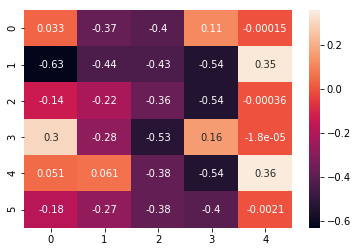

Correlation threshold: 0.35
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[  1.12286828e-01  -3.70776028e-01  -3.85645231e-01  -1.18221134e-01
  -2.33583862e-04]
[-0.58379928 -0.42995316 -0.83396499 -0.19499373  0.00180291]
[ 0.08912181 -0.12406996 -0.85080019 -0.54184937  0.35342511]
[ 0.073989   -0.36781614 -0.3742869   0.14969136  0.40368672]
[ 0.0506225   0.06115138 -0.37884434 -0.54137609  0.35721938]
[-0.04465487 -0.27201535 -0.37809222 -0.40277778 -0.00213474]



['ANN' 'Bayes_R' 'ANN' 'Lin_Reg' 'Bayes_R']
['ANN' 'Bayes_R' 'Ada_B' 'SVM' 'KNN']
['KNN' 'Lin_Reg' 'ANN' 'Bayes_R' 'Lin_Reg']
['KNN' 'Bayes_R' 'Bayes_R' 'KNN' 'ANN']
['Bayes_R' 'SVM' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'KNN' 'Bayes_R']


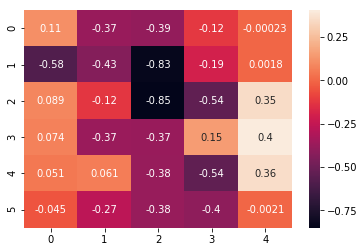

Correlation threshold: 0.4
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.13247346 -0.3429791  -0.53583985 -0.05640973  0.06967495]
[-0.7501919  -0.01111427 -1.         -0.45398607  0.04406929]
[ 0.08912181 -0.12406996 -0.72813688 -0.54184937  0.35342511]
[  7.39889967e-02  -3.67816142e-01  -3.74286898e-01   1.49691358e-01
  -3.91229715e-05]
[ 0.0506225   0.06115138 -0.36349104 -0.37604755  0.35721938]
[ 0.06814608 -0.27201535 -0.37809222 -0.25236815 -0.00213474]



['Bayes_R' 'ANN' 'Bayes_R' 'Lin_Reg' 'ANN']
['ANN' 'ANN' 'Nan' 'Lin_Reg' 'ANN']
['KNN' 'Lin_Reg' 'ANN' 'Bayes_R' 'Lin_Reg']
['KNN' 'Bayes_R' 'Bayes_R' 'KNN' 'Bayes_R']
['Bayes_R' 'SVM' 'Ada_B' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'ANN' 'Bayes_R']


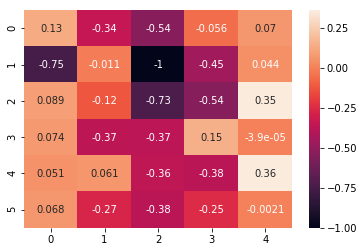

Correlation threshold: 0.45
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[  1.49525572e-01  -3.70165068e-01  -5.35839847e-01  -5.64097300e-02
  -2.41150954e-04]
[-0.77115518  0.09570693 -0.66832971 -0.45398607 -0.07592626]
[ 0.08912181 -0.12406996 -1.         -0.54184937  0.35342511]
[  7.39889967e-02  -3.67816142e-01  -3.23903722e-01   1.49691358e-01
  -3.91229715e-05]
[ 0.0506225   0.06115138 -0.34744933 -0.54137609  0.35721938]
[-0.29134066 -0.27201535 -0.37809222 -0.40277778 -0.00213474]



['ANN' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['Bayes_R' 'ANN' 'ANN' 'Lin_Reg' 'KNN']
['KNN' 'Lin_Reg' 'Nan' 'Bayes_R' 'Lin_Reg']
['KNN' 'Bayes_R' 'Ada_B' 'KNN' 'Bayes_R']
['Bayes_R' 'SVM' 'Ada_B' 'Bayes_R' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'KNN' 'Bayes_R']


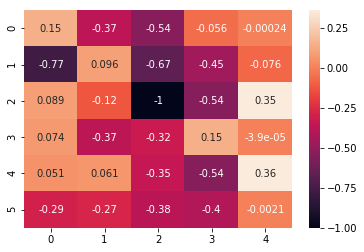

Correlation threshold: 0.5
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.13247346 -0.37016507 -0.53583985 -0.05640973  0.03387305]
[-0.53647865 -0.36859456 -0.79464179 -0.45398607 -0.07592626]
[ 0.08912181 -0.12406996 -1.          0.13121295  0.35342511]
[  7.39889967e-02  -3.67816142e-01  -3.74286898e-01   1.49691358e-01
  -3.91229715e-05]
[ 0.0506225   0.06115138 -0.37884434 -0.54137609  0.35721938]
[-0.15462314 -0.27201535 -0.37809222 -0.40277778 -0.00213474]



['Bayes_R' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'Ada_B']
['ANN' 'Bayes_R' 'ANN' 'Lin_Reg' 'KNN']
['KNN' 'Lin_Reg' 'Nan' 'ANN' 'Lin_Reg']
['KNN' 'Bayes_R' 'Bayes_R' 'KNN' 'Bayes_R']
['Bayes_R' 'SVM' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'KNN' 'Bayes_R']


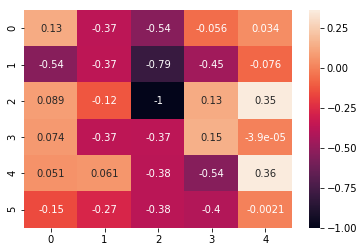

**********
Minimum correlation variables: 12
Correlation threshold: 0.3
----------
['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.01276161 -0.01681483 -0.1535882   0.66405993  0.46491762]
[-0.18530998 -0.56239418 -0.27574855 -0.46696885  0.25559631]
[-0.11048003 -0.37825434 -0.09114958 -0.55890688  0.18549724]
[ 0.09343316 -0.18511187 -0.30057091 -0.5426864   0.07400552]
[ 0.16520482 -0.00176595 -0.37852886 -0.31800655 -0.00091767]
[-0.05403925 -0.12459727 -0.37773272 -0.44140827 -0.20799132]



['KNN' 'ANN' 'KNN' 'Ada_B' 'Lin_Reg']
['ANN' 'Ada_B' 'Ada_B' 'ANN' 'SVM']
['KNN' 'Bayes_R' 'SVM' 'Bayes_R' 'KNN']
['KNN' 'ANN' 'ANN' 'Bayes_R' 'KNN']
['ANN' 'SVM' 'Bayes_R' 'Ada_B' 'Bayes_R']
['ANN' 'SVM' 'Bayes_R' 'Bayes_R' 'ANN']


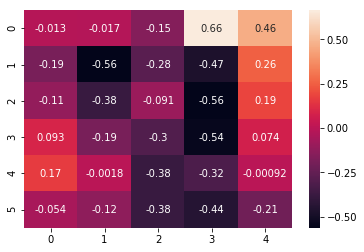

Correlation threshold: 0.33
----------


In [ ]:
for n_vars in n_min_corr_vars:
    print '*'*10
    print 'Minimum correlation variables: {0}'.format(n_vars)
    for threshold in thresholds:
        print 'Correlation threshold: {0}'.format(threshold)
        print '-'*10
        models_dict = regression_per_task.main(path_to_pickle=path_to_pickle,
                             test_size = test_size,
                             print_extended=False,
                             pca=False,
                             variance_features = None,
                             correlation_features=threshold,
                             n_min_corr_vars=n_vars)